In [1]:
% matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from ipykernel import kernelapp as app

In [3]:
airpath = '/Users/hrm/Documents/Dropbox/DSrelated/Metis/climate_related/AirQualityData/'
PM25file = 'dailyAQS_PM2-5_NYC_' #2009.csv'
Ozonefile = 'dailyAQS_Ozone_NYC_'#2009.csv'

In [58]:
pdPM=pd.DataFrame()
pdOz=pd.DataFrame()

for y in range(2006,2015):
    #print(airpath+PM25file+format(y)+'.csv')

    # airpath+PM25file
    tmpPM25 = pd.read_csv(airpath+PM25file+format(y)+'.csv') #, skiprows=0) #, na_values=['.','-9999'] ) 
    tmpPM25.columns = [c.strip() for c in tmpPM25.columns]
#     tmpPM25.columns
    pdPM = pd.concat([pdPM, tmpPM25], axis=0)
    
    # airpath+Ozonefile
    tmpOz = pd.read_csv(airpath+Ozonefile+format(y)+'.csv') #, skiprows=0) #, na_values=['.','-9999',None] ) 
    tmpOz.columns = [c.strip() for c in tmpOz.columns]
#     tmpOz.columns
    pdOz = pd.concat([pdOz, tmpOz], axis=0)

In [59]:
# pdPM.Date[0]
tmpPM25.columns

Index(['Date', 'AQS_SITE_ID', 'POC', 'Daily Mean PM2.5 Concentration', 'UNITS',
       'DAILY_AQI_VALUE', 'DAILY_OBS_COUNT', 'PERCENT_COMPLETE',
       'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC', 'CBSA_CODE', 'CBSA_NAME',
       'STATE_CODE', 'STATE', 'COUNTY_CODE', 'COUNTY', 'SITE_LATITUDE',
       'SITE_LONGITUDE'],
      dtype='object')

In [30]:
fmt = '%m/%d/%Y' #'%m/%d/%y' 
pdPM['date_str'] = [dt.datetime.strptime(d,fmt).date() for d in pdPM.Date ]  #.astype(str)] )
pdPM['YR'] =[dt.datetime.strptime(d,fmt).year for d in pdPM.Date ]#.astype(str)] ).astype(int)
pdPM['MTH'] = [dt.datetime.strptime(d,fmt).month for d in pdPM.Date] #.astype(str)] #).astype(int)
pdPM['DAY'] = [dt.datetime.strptime(d,fmt).day for d in pdPM.Date ]#.astype(str)] #).astype(int)


pdOz['date_str'] = [dt.datetime.strptime(d,fmt).date() for d in pdOz.Date]#.astype(str)] )
pdOz['YR'] = [dt.datetime.strptime(d,fmt).year for d in pdOz.Date] #.astype(str)] ).astype(int)
pdOz['MTH'] = [dt.datetime.strptime(d,fmt).month for d in pdOz.Date] #.astype(str)] ).astype(int)
pdOz['DAY'] = [dt.datetime.strptime(d,fmt).day for d in pdOz.Date] #.astype(str)] ).astype(int)

In [ ]:
# pdPM['date_str'] = 
# pd.DataFrame([dt.datetime.strptime(d,fmt).date() for d in pdPM.Date.astype(str) ] )
# pdPM

In [ ]:
# pdPM

In [ ]:
# pdOz

In [50]:
select_tmpPM25 = pd.concat([ pdPM[pdPM['COUNTY']=='New York'] , 
                          pdPM[pdPM['COUNTY']=='Bronx'], 
                          pdPM[pdPM['COUNTY']=='Queens'] ],
                         axis=0).reset_index().iloc[:,1:]

select_tmpOz = pd.concat([ pdOz[pdOz['COUNTY']=='New York'] , 
                          pdOz[pdOz['COUNTY']=='Bronx'], 
                          pdOz[pdOz['COUNTY']=='Queens'] ],
                         axis=0).reset_index().iloc[:,1:]

In [ ]:
# select_tmpPM25

In [ ]:
# select_tmpOz

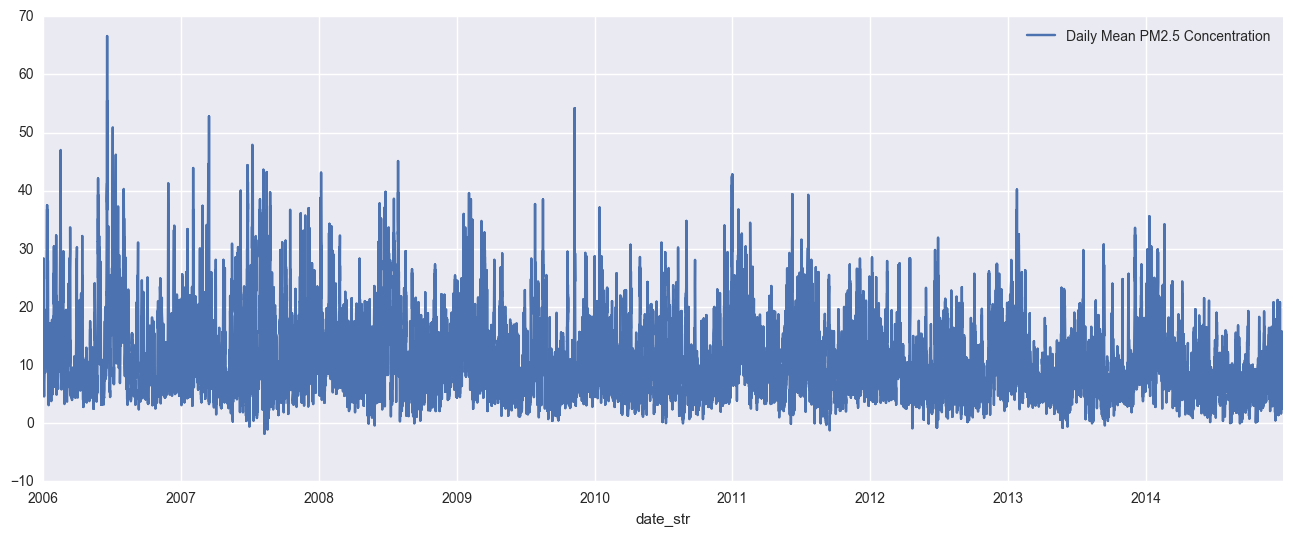

In [32]:
select_tmpPM25.plot(y=['Daily Mean PM2.5 Concentration'],x='date_str',figsize=[16,6]);

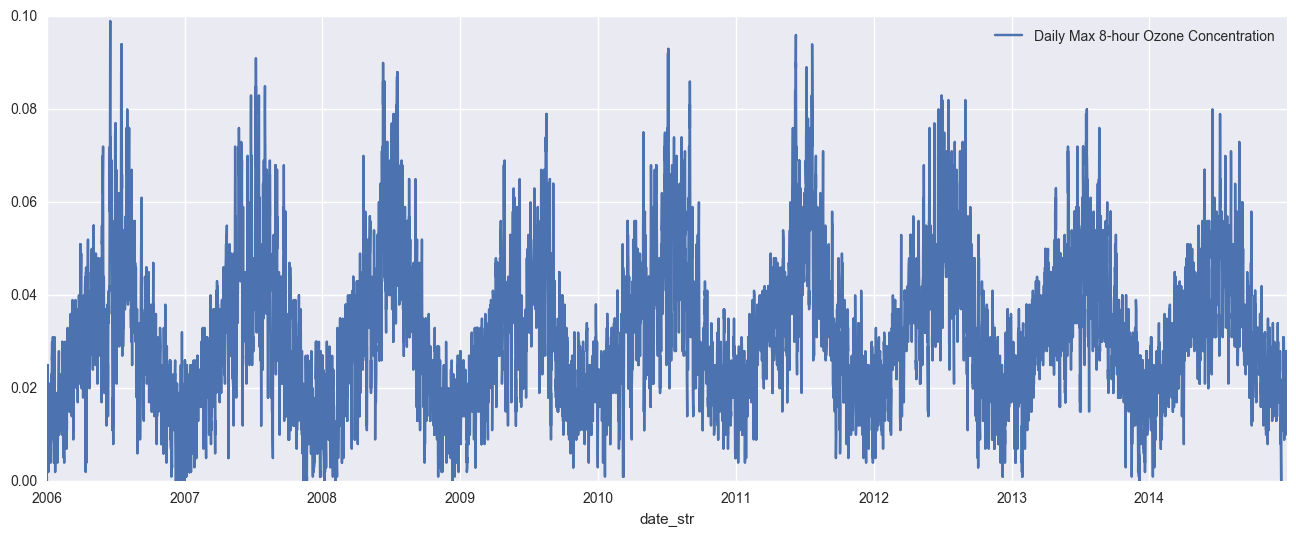

In [33]:
select_tmpOz.plot(y=['Daily Max 8-hour Ozone Concentration'],x='date_str',figsize=[16,6]);

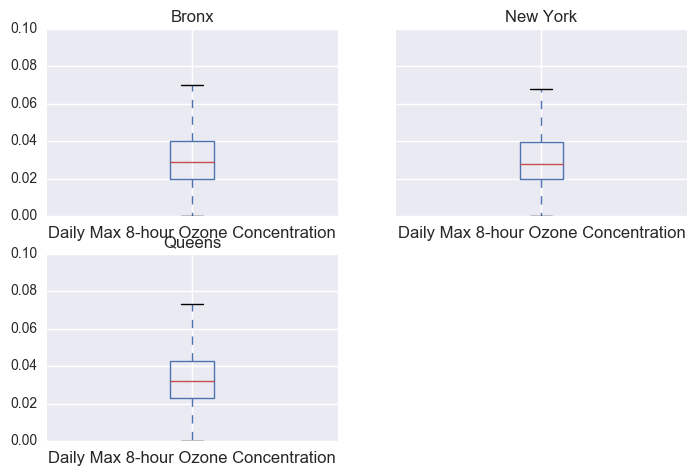

In [34]:
select_tmpOz[['date_str','COUNTY',
              'Daily Max 8-hour Ozone Concentration']].groupby(by=['COUNTY'],
                                                               as_index=True).boxplot(return_type='axes');

In [35]:
(select_tmpOz[select_tmpOz['COUNTY']=='New York'].Date.unique().shape, 
select_tmpOz[select_tmpOz['COUNTY']=='Bronx'].Date.unique().shape, 
select_tmpOz[select_tmpOz['COUNTY']=='Queens'].Date.unique().shape)

((2611,), (3277,), (3074,))

In [11]:
365*9

3285

In [ ]:
# select_tmpOz[select_tmpOz['COUNTY']=='New York'].date_str.value_counts()

In [ ]:
# select_tmpOz

In [36]:
# select_tmpOz[['Date','date_str','YR','MTH','DAY','COUNTY','Daily Max 8-hour Ozone Concentration']] # ozone-unit:ppm
meanOz = select_tmpOz[['Date','date_str','YR','MTH','DAY','COUNTY','Daily Max 8-hour Ozone Concentration']].groupby(by=['date_str'], as_index=False).mean()
meanOz = meanOz.rename(columns = {'Daily Max 8-hour Ozone Concentration':'Mean Daily Max 8-hr Ozone Concentration'})
# meanOz`

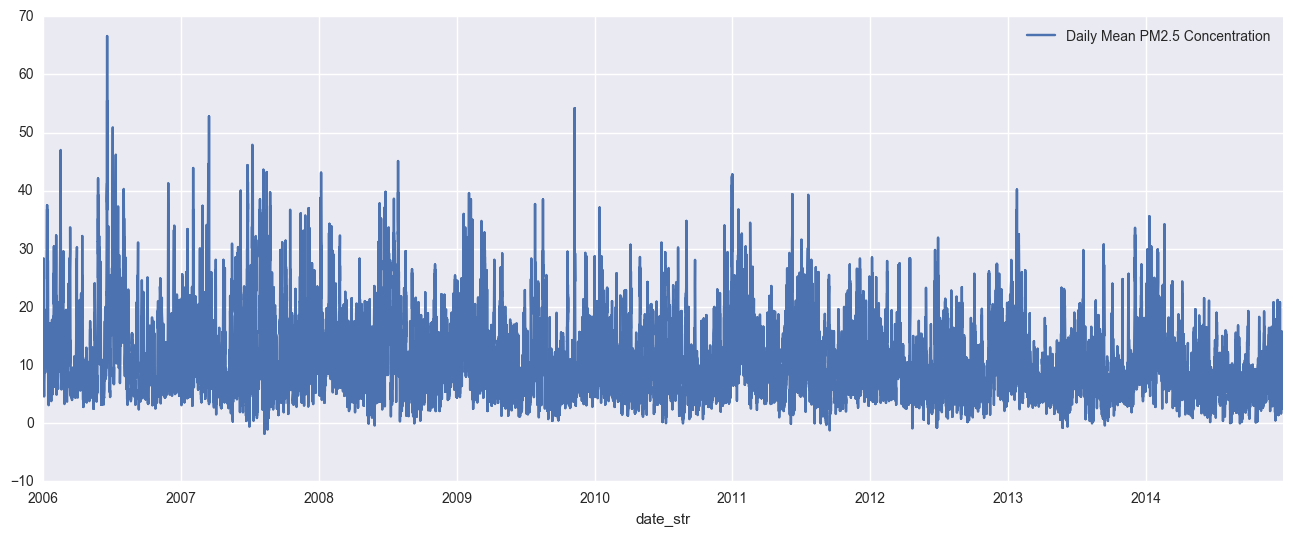

In [57]:
# figsize=[16,6]
# plt.plot(select_tmpPM25['Daily Mean PM2.5 Concentration']);
select_tmpPM25.plot(y=['Daily Mean PM2.5 Concentration'],x='date_str',figsize=[16,6]);

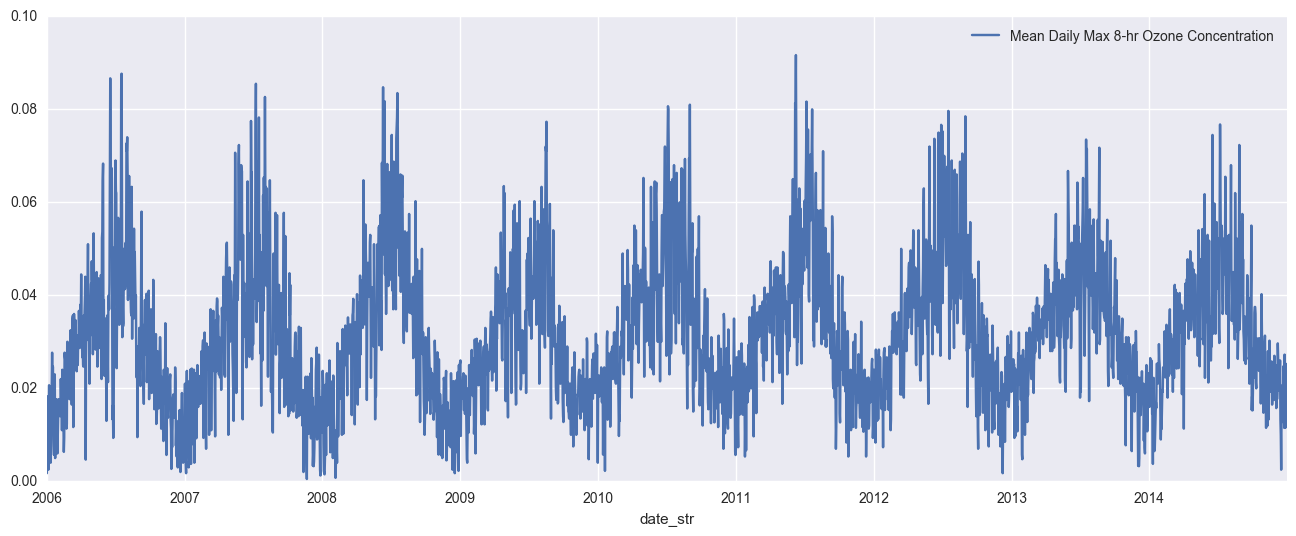

In [37]:
# meanOz.plot(x=meanOz.index,y='Mean Daily Max 8-hr Ozone Concentration');
meanOz.plot(x=meanOz.date_str,y='Mean Daily Max 8-hr Ozone Concentration',figsize=[16,6]);
meanOz.to_csv(airpath+'meanDailyOzoneConc.csv')

In [ ]:
# select_tmpPM25

In [47]:
# select_tmpPM25[['Date','date_str','YR','MTH','DAY','COUNTY','Daily Mean PM2.5 Concentration']] #PM2.5 unit:ug/m3 LC
meanPM25 = select_tmpPM25[['Date','date_str','YR','MTH','DAY','COUNTY','Daily Mean PM2.5 Concentration']].groupby(by=['date_str'], as_index=False).mean()
# meanPM25

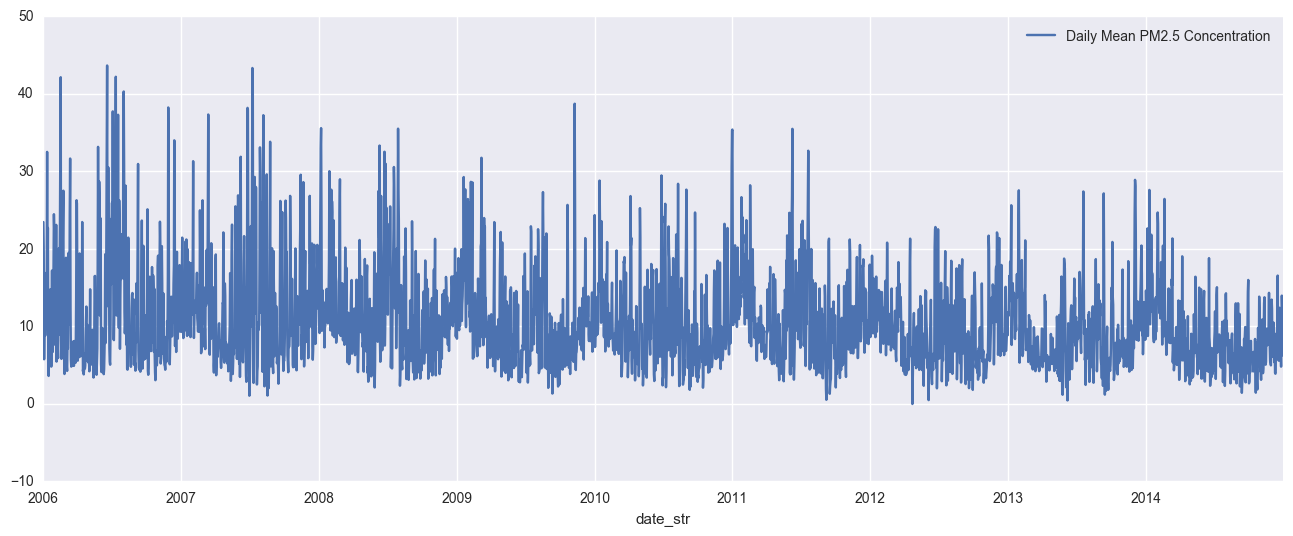

In [48]:
# meanPM25.plot(x=meanPM25.index,y='Daily Mean PM2.5 Concentration');
meanPM25.plot(x=meanPM25.date_str,y='Daily Mean PM2.5 Concentration',figsize=[16,6]);
meanPM25.to_csv(airpath+'meanDailyPM2-5Conc.csv')

In [ ]:
2191/365

In [ ]:
# pd.DataFrame([np.nan, np.nan, 10]).mean() # 0    10.0

In [ ]:
PM25file = 'dailyAQS_PM2-5_NYC_2009.csv'
tmpPM25 = pd.read_csv(airpath+PM25file, skiprows=0) #, na_values=['.','-9999'] ) 
tmpPM25.columns = [c.strip() for c in tmpW.columns]
tmpPM25.columns

In [ ]:
tmpPM25.COUNTY.unique()

In [ ]:
tmpPM25[tmpPM25['COUNTY']=='New York'].Date.unique().shape

In [ ]:
tmpPM25[tmpPM25['COUNTY']=='Bronx'].Date.unique().shape

In [ ]:
tmpPM25[tmpPM25['COUNTY']=='Queens'].Date.unique().shape

In [ ]:
Ozonefile = 'dailyAQS_Ozone_NYC_2009.csv'
tmpOz = pd.read_csv(airpath+Ozonefile) #, skiprows=0, na_values=['.','-9999']) 
tmpOz.columns = [c.strip() for c in tmpW.columns]
tmpOz.columns

In [ ]:
tmpOz.COUNTY.unique()

In [ ]:
(tmpOz['Date']==None).sum()

tmpOz.Date.isnull().sum()

In [ ]:
fmt = '%m/%d/%y' # %Z' # similar to '%m/%d/%y' https://www.tutorialspoint.com/python/time_strptime.htm

# tmpOz['Date'] = 
[dt.datetime.strptime(d,fmt) for d in tmpOz['Date'].astype(str) ]

# tmpOz['YR'] = pd.DataFrame([dt.datetime.strptime(d,fmt).year for d in tmpOz['Date'].astype(str)] ).astype(int)
# tmpOz['MTH'] = pd.DataFrame([dt.datetime.strptime(d,fmt).month for d in tmpOz['Date'].astype(str)] ).astype(int)
# tmpOz['DAY'] = pd.DataFrame([dt.datetime.strptime(d,fmt).day for d in tmp2['Date'].astype(str)] ).astype(int)

In [ ]:
tmpOz = tmpOz.dropna()
tmpOz
# tmpzSite

In [24]:
# plt.subplot(1,1,1)
tmpOz[tmpOz['COUNTY']=='New York'].shape #.plot(x='Date', y=['Daily Mean PM2.5 Concentration']);
# plt.subplot(1,1,1)
tmpOz[tmpOz['COUNTY']=='Bronx'].shape #.plot(x='Date', y=['Daily Mean PM2.5 Concentration']);
# # plt.subplot(1,1,1)
tmpOz[tmpOz['COUNTY']=='Queens'].shape; #.plot(x='Date', y=['Daily Mean PM2.5 Concentration']);

In [ ]:
tmpOz[tmpOz['COUNTY']=='Bronx']

In [ ]:
tmpOz.Date.unique().shape

In [ ]:
tmpOz[tmpOz['COUNTY']=='New York'].Date.unique().shape

In [ ]:
tmpOz[tmpOz['COUNTY']=='Bronx'].Date.unique().shape

In [ ]:
tmpOz[tmpOz['COUNTY']=='Queens'].Date.unique().shape

In [ ]:
select_tmpOz = pd.concat([ tmpOz[pdOz['COUNTY']=='New York'] , 
                          tmpOz[tmpOz['COUNTY']=='Bronx'], 
                          tmpOz[tmpOz['COUNTY']=='Queens'] ],
                         axis=0)#.reset_index()

In [ ]:
# idx2keep = [tmpOz[tmpOz['COUNTY']=='Bronx'].index.tolist() ,  tmpOz[tmpOz['COUNTY']=='New York'].index.tolist(),  tmpOz[tmpOz['COUNTY']=='Queens'].index.tolist()][0]

In [ ]:
# select_tmpOz = 
# plt.figure(figsize=[10,5])
select_tmpOz[['Date','COUNTY','Daily Mean PM2.5 Concentration']].groupby(by=['COUNTY'],as_index=True).boxplot();

In [ ]:
tmpOz.shape